In [2]:
#Importar Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB
None


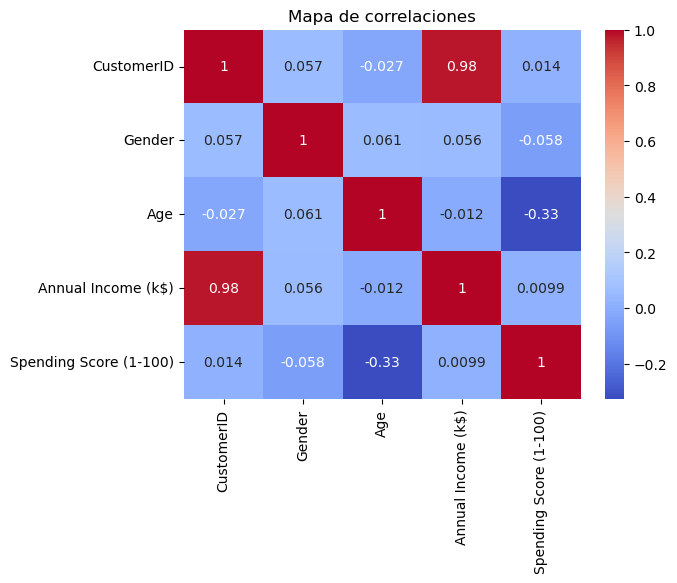

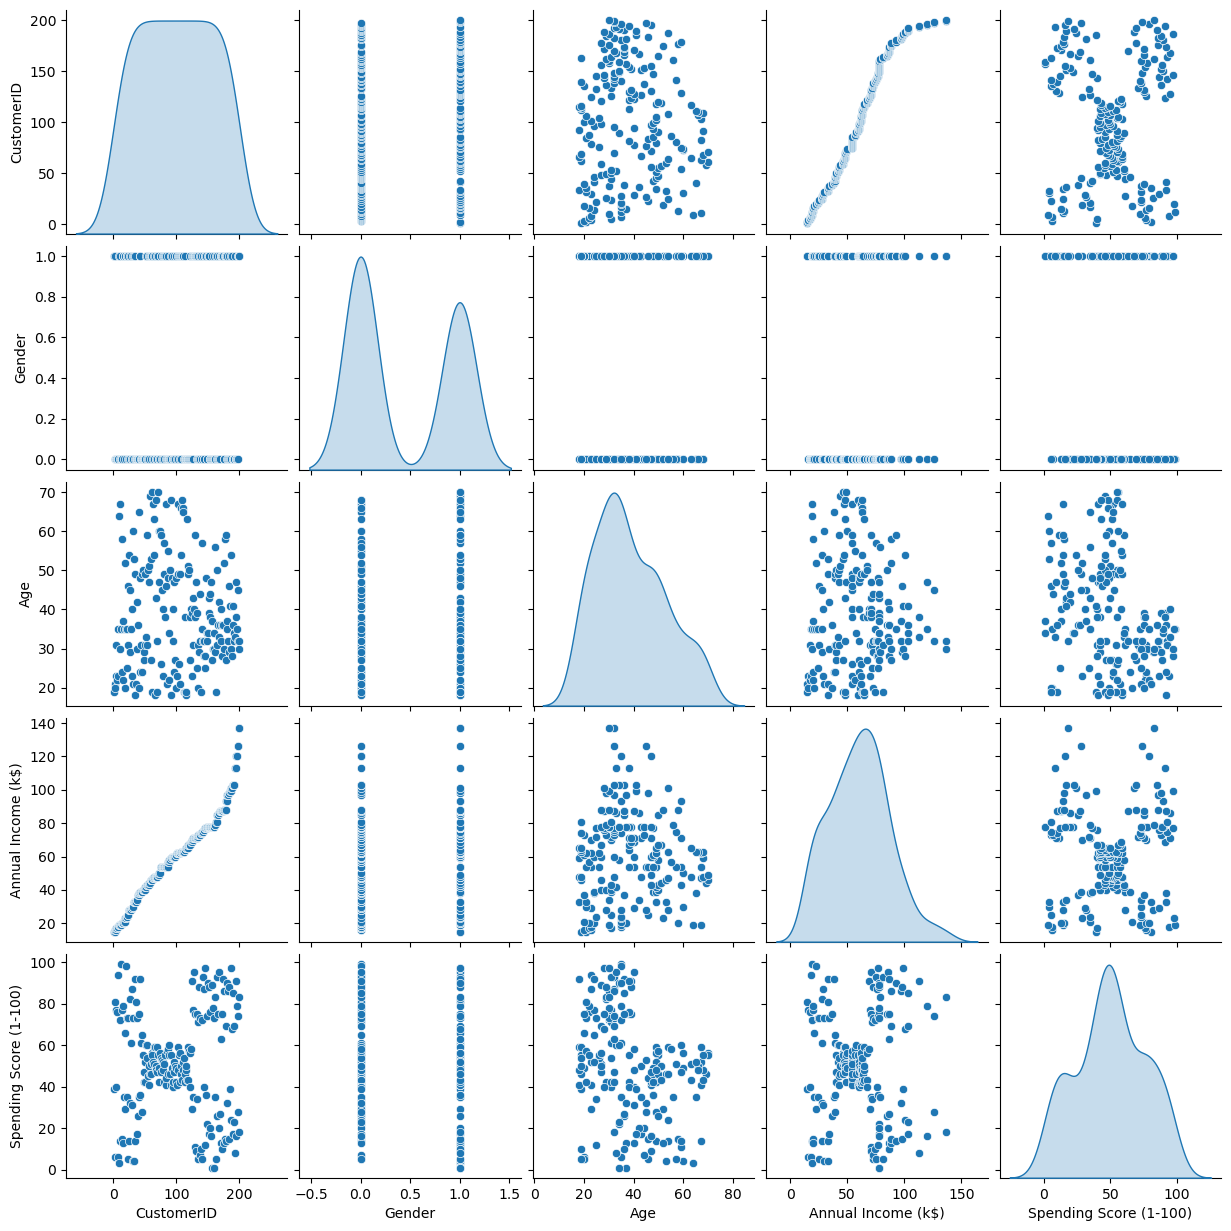

In [4]:
# 1. Cargar y Explorar datos

# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')

# Mostrar las primeras filas para inspeccionar
print(data.head())

# Convertir la columna 'Gender' en numérica
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Revisar la información general
print(data.info())

# Analizar las correlaciones
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

# Graficar distribuciones de variables numéricas
sns.pairplot(data, diag_kind="kde")
plt.show()

In [6]:
# 2. Preprocesameinto de datos

# Codificar género como variable numérica
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Seleccionar solo las columnas numéricas relevantes
features = ['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 3. Selección de características más relevantes
"Dado que tenemos un conjunto reducido de características, utilizaremos todas para el clustering jerárquico, ya que todas aportan información sobre el comportamiento del cliente."

'Dado que tenemos un conjunto reducido de características, utilizaremos todas para el clustering jerárquico, ya que todas aportan información sobre el comportamiento del cliente.'

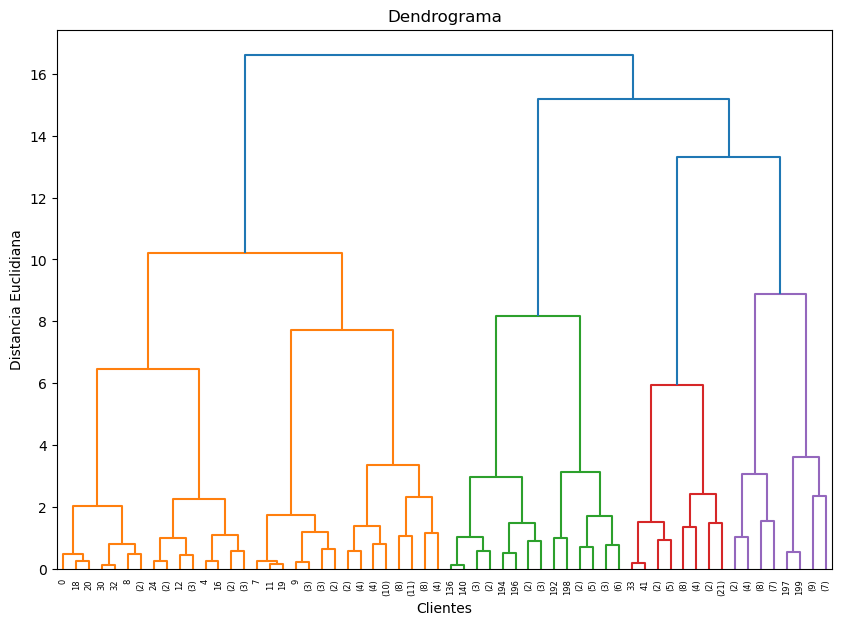

In [10]:
# 4. Entrenamiento del modelo

# Calcular la matriz de linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [12]:
# 5. Evaluación del modelo

# Selección del número de clústeres
num_clusters = 5
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Evaluar métricas
silhouette = silhouette_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
davies = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Coeficiente de Silhouette: {silhouette}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Indice Davies Bouldin: {davies}")

Coeficiente de Silhouette: 0.3916225135204479
Índice de Calinski-Harabasz: 93.25086031003248
Indice Davies Bouldin: 0.9556208250617398


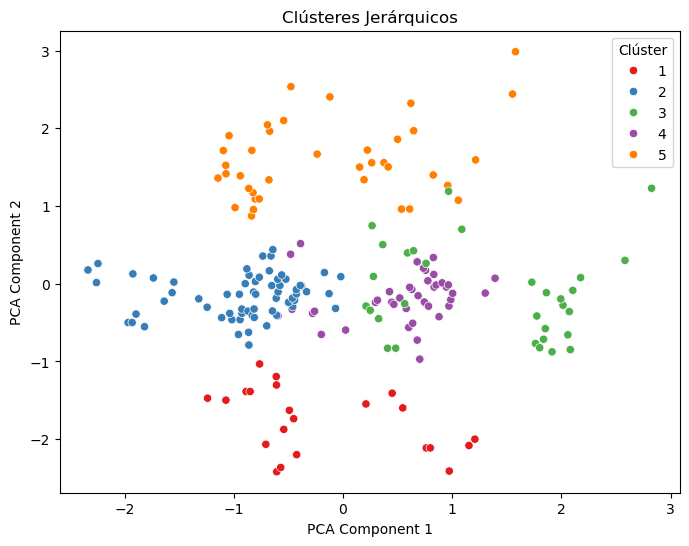

In [14]:
# 6. Visualización de resultados

# Reducir dimensiones a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set1")
plt.title("Clústeres Jerárquicos")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clúster")
plt.show()